In [1]:
import numpy as np

def auto_domain(max_extent, N=80, margin=0.3):
    L = max_extent + margin
    axis = np.linspace(-L, L, N)
    return np.meshgrid(axis, axis, axis, indexing='ij')

In [2]:
def implicit_cube(side, N=80):
    a = side / 2.0
    X, Y, Z = auto_domain(a, N=N)

    F = np.maximum.reduce([np.abs(X), np.abs(Y), np.abs(Z)]) - a
    return F

In [8]:
from skimage import measure

def mesh_from_scalar_field(F, level=0):
    verts, faces, normals, values = measure.marching_cubes(F, level=level)
    verts = np.array(verts)
    faces = np.array(faces)
    return verts, faces

In [9]:
def mesh_from_implicit(func, *args, **kwargs):

    F = func(*args, **kwargs)
    verts, faces = mesh_from_scalar_field(F)
    return verts, faces

In [12]:
def plot_mesh(verts, faces, color="cyan"):
    fig = plt.figure(figsize=(7,7))
    ax = fig.add_subplot(111, projection='3d')

    # Poly3DCollection espera lista de polígonos
    triangles = verts[faces]

    mesh = Poly3DCollection(triangles, alpha=0.7)
    mesh.set_edgecolor("k")
    mesh.set_facecolor(color)
    ax.add_collection3d(mesh)


    ax.auto_scale_xyz(verts[:,0], verts[:,1], verts[:,2])

    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")

    plt.tight_layout()
    plt.show()

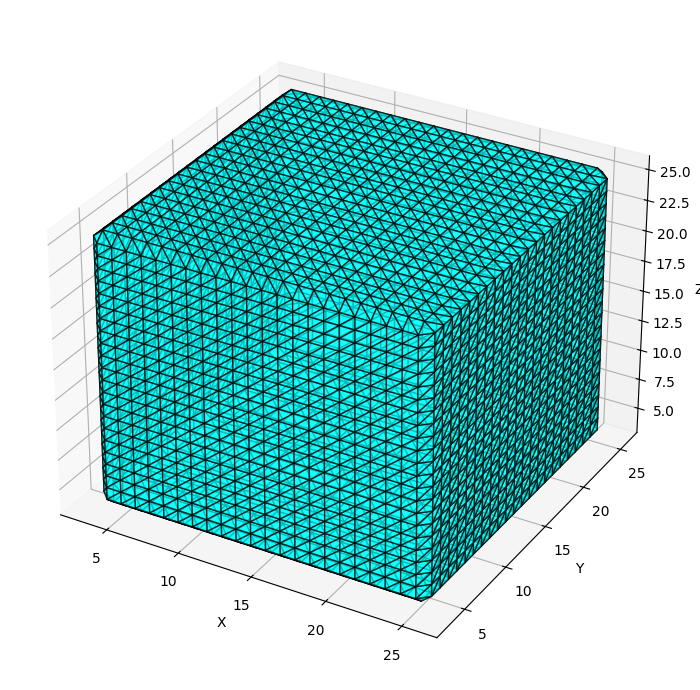

In [16]:
verts, faces = mesh_from_implicit(implicit_cube, side=2, N=30)
plot_mesh(verts, faces, color="cyan")